#Преобразование данных с использованием Pandas

Прежде чем приступать к углублению знаний о библиотеке `pandas`, обсудим её роль и применимость в задачах анализа данных.

##Методология CRISP-DM в анализе данных

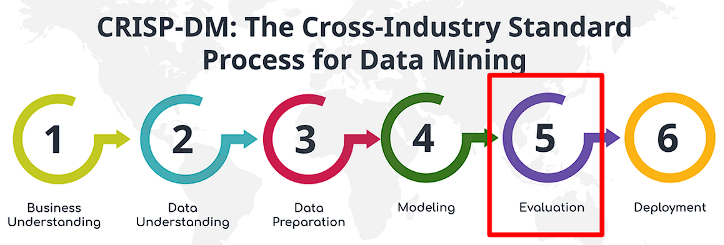

**CRISP-DM** (Cross-Industry Standard Process for Data Mining) — это методология, разработанная компанией IBM для управления процессами Data Science и Data Mining. Она предоставляет структурированный подход к реализации проектов в этих областях, состоящий из шести ключевых этапов:

1. **Business Understanding** (бизнес-анализ) — определение целей проекта и требований со стороны бизнеса.
2. **Data Understanding** (понимание данных) — сбор данных и их предварительный анализ для выявления свойств и потенциальных проблем.
3. **Data Preparation** (подготовка данных) — подготовка данных к анализу, включая очистку, обработку недостающих значений и преобразование данных в необходимый формат.
4. **Modeling** (моделирование) — построение и настройка моделей на основе подготовленных данных.
5. **Evaluation** (оценка) — оценка моделей и результатов, проверка соответствия бизнес-целям.
6. **Deployment** (внедрение) — внедрение модели и ее использование в реальном времени, то есть инференс.

##Роль pandas в анализе данных

Предыдущая лекция была посвящена **сбору данных**. На этапе **предобработки**, который мы рассмотрим на этом занятии, решаются проблемы с качеством данных, которые могут повлиять на результаты анализа и моделей.

Именно на этом этапе `pandas` используется как стандарт индустрии для **табличных данных**. С использованием библиотеки осуществляется заполнение пропусков, преобразование типов, фильтрация и агрегация.

##Индексация: loc и iloc. Простой пример

Дан небольшой `DataFrame` с индексами a, b, c, d и колонками A, B, C. Потренируемся выбирать отдельные строки, столбцы, срезы и комбинированные выборки с помощью loc и iloc.

In [ ]:
import pandas as pd

df = pd.DataFrame({
        'A':[10,-5,-10,3],
        'B':[1,0,1,0],
        'C':[100,90,110,80]
    },
    index=['a','b','c','d']
)
df

,A,B,C
a,10,1,100
b,-5,0,90
c,-10,1,110
d,3,0,80


Извлечение данных из `DataFrame` на основе названий колонок осуществляется с помощью квадратных скобок.

In [ ]:
df[['A', 'C']]

,A,C
a,10,100
b,-5,90
c,-10,110
d,3,80


`loc` индексирует по **меткам**: строковые индексы и имена столбцов. С его помощью выбирают отдельную строку, диапазон по меткам, столбцы по именам, булевы маски.

Сначала обрабатываются метки строк, а затем, если указаны, столбцов. Выведем данные о строке с меткой `a`

In [ ]:
df.loc['a']

,a
A,10
B,1
C,100


О строках `a` и `c`, столбцах `A`, `C`.

In [ ]:
df.loc[['a','c'], ['A','C']]

,A,C
a,10,100
c,-10,110


Возьмём срез от `b` до `d` и столбец `B`.

In [ ]:
df.loc['b':'d', 'B']

,B
b,0
c,1
d,0


Выберем только те строки, в которых значения в колонке `A` положительны. Для этих строк выберем `A` и `C`.

In [ ]:
df.loc[df['A'] > 0, ['A','C']]

,A,C
a,10,100
d,3,80


`iloc` индексирует по **позициям**: целые **номера** строк/столбцов (от 0). Полезно, когда нужна позиционная выборка.

Произведём те же операции, но с использованием `iloc`.

In [ ]:
df.iloc[0]

,a
A,10
B,1
C,100


In [ ]:
df.iloc[[0,2],[0,2]]

,A,C
a,10,100
c,-10,110


In [ ]:
df.iloc[1:4,1]

,B
b,0
c,1
d,0


##Работа временными рядами. Курс доллара и евро за октябрь 2025

###Постановка задачи

Имеется информация о курсе доллара и евро за октябрь 2025. Сведения собраны с сайта Минфина и сохранены в `CSV`-файл `rub-to-usd-eur.csv`. Часть данных потеряна, то есть имеются **пропуски**. Попрактикуемся в предобработке на этом примере.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving rub-to-usd-eur.csv to rub-to-usd-eur.csv


Загрузка данных и первичный просмотр.

In [ ]:
df = pd.read_csv('rub-to-usd-eur.csv', sep=';')
df

,Date,USD Exchange Rate,EUR Exchange Rate
0,"October 31, 2025",80.5037,93.3894
1,"October 30, 2025",79.4715,92.2466
2,"October 29, 2025",79.8174,92.9395
3,"October 28, 2025",78.9848,92.0233
4,"October 27, 2025",80.9713,94.0820
5,"October 26, 2025",80.9713,NaN
6,"October 25, 2025",80.9713,NaN
7,"October 24, 2025",81.2690,94.3889
8,"October 23, 2025",81.6549,94.7543
9,"October 22, 2025",81.3475,94.6656


Очевидно, что удобнее сразу перейти от индекса в виде числа к индексу-дате.

`datetime` — это тип данных, используемый для представления даты и времени. Он позволяет удобно работать с временными метками, выполнять арифметические операции с датами и анализировать временные ряды.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

,Date
0,2025-10-31
1,2025-10-30
2,2025-10-29
3,2025-10-28
4,2025-10-27


Используем колонку `Date` для индексации.

In [ ]:
df = df.set_index('Date')
df.head()

,USD Exchange Rate,EUR Exchange Rate
Date,,
2025-10-31,80.5037,93.3894
2025-10-30,79.4715,92.2466
2025-10-29,79.8174,92.9395
2025-10-28,78.9848,92.0233
2025-10-27,80.9713,94.0820


Отсортируем данные по убыванию индекса.

In [ ]:
df = df.sort_index(ascending=True)
df.head()

,USD Exchange Rate,EUR Exchange Rate
Date,,
2025-10-01,82.6084,96.8644
2025-10-02,81.4967,95.6382
2025-10-03,81.0085,95.3411
2025-10-04,81.8969,96.0525
2025-10-05,81.8969,NaN


Просмотрим пропуски `NaN`.

In [ ]:
df.isna().sum()

,0
USD Exchange Rate,3
EUR Exchange Rate,3


Пропуски можно заполнять по-разному: средним, наиболее частым элементом, нулями, максимумом и т. д. Конкретно в нашем случае очевидно, что пропуски лучше заполнять предыдущими или последующими доступными значениями.

Применим метод `bfill` (backward fill).

In [ ]:
df_bfill = df.bfill()
df_bfill

,USD Exchange Rate,EUR Exchange Rate
Date,,
2025-10-01,82.6084,96.8644
2025-10-02,81.4967,95.6382
2025-10-03,81.0085,95.3411
2025-10-04,81.8969,96.0525
2025-10-05,81.8969,96.0525
2025-10-06,83.0000,96.0525
2025-10-07,83.0000,96.8345
2025-10-08,81.9349,95.6722
2025-10-09,81.5478,94.9351


Применим метод `ffill` (forward fill).

In [ ]:
df_ffill = df.ffill()
df_ffill

,USD Exchange Rate,EUR Exchange Rate
Date,,
2025-10-01,82.6084,96.8644
2025-10-02,81.4967,95.6382
2025-10-03,81.0085,95.3411
2025-10-04,81.8969,96.0525
2025-10-05,81.8969,96.0525
2025-10-06,81.8969,96.0525
2025-10-07,83.0000,96.8345
2025-10-08,81.9349,95.6722
2025-10-09,81.5478,94.9351


Допустим, мы всё же захотели заполнять пропуски средним значением. Вычислим среднее в каждом столбце.

In [ ]:
mean_usd = df['USD Exchange Rate'].mean()
mean_eur = df['EUR Exchange Rate'].mean()
mean_usd, mean_eur

(np.float64(80.97895357142856), np.float64(94.33122499999999))

Применим заполнение пропущенных значений в каждом столбце отдельно через `fillna`.

In [ ]:
df_mean_fill = df.copy()
df_mean_fill['USD Exchange Rate'] = df_mean_fill['USD Exchange Rate'].fillna(mean_usd)
df_mean_fill['EUR Exchange Rate'] = df_mean_fill['EUR Exchange Rate'].fillna(mean_eur)
df_mean_fill

,USD Exchange Rate,EUR Exchange Rate
Date,,
2025-10-01,82.608400,96.864400
2025-10-02,81.496700,95.638200
2025-10-03,81.008500,95.341100
2025-10-04,81.896900,96.052500
2025-10-05,81.896900,94.331225
2025-10-06,80.978954,96.052500
2025-10-07,83.000000,96.834500
2025-10-08,81.934900,95.672200
2025-10-09,81.547800,94.935100


Остановимся на заполнении пропусков предыдущим значением.

Из ячейки выше видно, что использование `=` при работе с `DataFrame` не всегда компактно. Альтернативным вариантом можно передавать в методы параметр **`inplace=True`**, тогда преобразования будут изменять саму таблицу.

In [ ]:
df.bfill(inplace=True)
df.isna().sum()

,0
USD Exchange Rate,0
EUR Exchange Rate,0


Отфильтруем строки с использованием `where`. Оставим только те, где значения выше средних. В остальные автоматически запишется `NaN`.

In [ ]:
mask = (df['USD Exchange Rate'] > mean_usd) & (df['EUR Exchange Rate'] > mean_eur)
df.where(mask, inplace=True)

Удалим неподходящие строки.

In [ ]:
df.dropna(how='all', inplace=True)
df

,USD Exchange Rate,EUR Exchange Rate
Date,,
2025-10-01,82.6084,96.8644
2025-10-02,81.4967,95.6382
2025-10-03,81.0085,95.3411
2025-10-04,81.8969,96.0525
2025-10-05,81.8969,96.0525
2025-10-06,83.0000,96.0525
2025-10-07,83.0000,96.8345
2025-10-08,81.9349,95.6722
2025-10-09,81.5478,94.9351


Визуализируем полученные результаты. Объекты `DataFrame` поддерживают функционал библиотеки `matplotlib`, в том числе метод `.plot()`

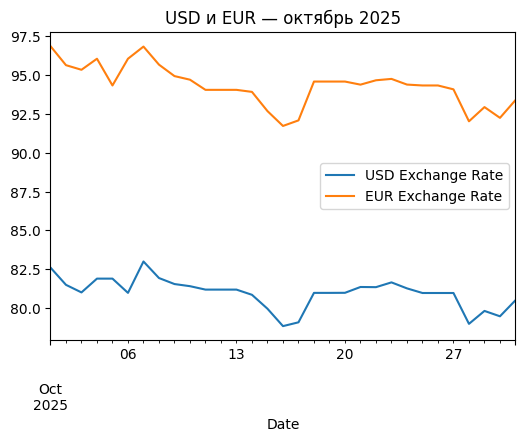

In [ ]:
import matplotlib.pyplot as plt

ax = df_mean_fill.plot(
    y=['USD Exchange Rate','EUR Exchange Rate'],
    figsize=(6,4),
    title='USD и EUR — октябрь 2025',

)

ax.legend(loc='best')
plt.show()

##Реальный пример. Датасет TED Talks с Kaggle


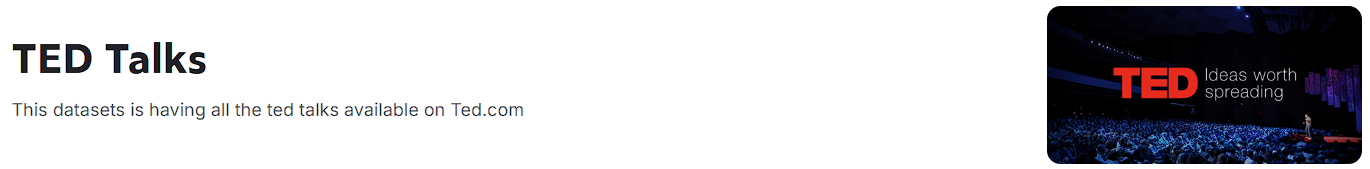

###Постановка задачи

Имеется [датасет](https://www.kaggle.com/datasets/ashishjangra27/ted-talks/) с данными о 5 тысячах видео от проекта Ted.com. В таблице приведена информация об авторах, количестве комментариев, лайков, датах и т. д.

Необходимо решить ряд задач:

1. Получить информацию о наиболее популярных и активных авторах.
2. Отсортировать таблицу по названию видео, отобрать самые популярные.
3. Извлечь `slug` из ссылок.
4. Сохранить в отдельные `CSV` данные о видео 10 наиболее популярных авторов.
5. Визуализировать изменение среднего числа просмотров за все доступные годы.

Установим библиотеку для скачивания датасета

In [ ]:
!pip install -q opendatasets

Сохраним токен Kaggle в необходимой для opendatasets директории.

In [ ]:
from google.colab import files
import os

uploaded = files.upload()

Saving kaggle.json to kaggle.json


Скачаем датасет.

In [ ]:
import opendatasets as od

url = 'https://www.kaggle.com/datasets/ashishjangra27/ted-talks/'
od.download(url)

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/ted-talks


100%|██████████| 298k/298k [00:00<00:00, 500MB/s]

In [ ]:
os.listdir('./ted-talks')

['data.csv']

In [ ]:
df = pd.read_csv('./ted-talks/data.csv')
df.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


Проверим на пропуски.

In [ ]:
df.isna().sum()

,0
title,0
author,1
date,0
views,0
likes,0
link,0


В данных всего один пропуск. Удалим соответствующую строку.

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
title,0
author,0
date,0
views,0
likes,0
link,0


От данных о видео перейдём к данным об их авторах. Для этого сгруппируем данные так, что каждая строка новой таблицы будет определяться уникальному автору  из старой. Число лайков и комментариев просуммируем. Вычислим количество видео у каждого автора.

In [ ]:
df_auth = df.groupby('author', as_index=False).agg({'title':'count',
    'views':'sum',
    'likes':'sum'
})
df_auth = df_auth.rename(columns={
    'title':'talk_count',
    'views':'total_views',
    'likes':'total_likes'
})
df_auth.head()

,author,talk_count,total_views,total_likes
0,B.E.A.T. NYC,1,3200,98
1,Beautyrest,1,60000,1800
2,Belle and Sebastian,1,23000,690
3,Butterscotch,1,31000,933
4,Climbing PoeTree,1,12000,367


Получим данные о наиболее активных и просматриваемых авторах. Для этого отсортируем таблицу с авторами.

In [ ]:
df_auth.sort_values('talk_count', ascending=False).head()

,author,talk_count,total_views,total_likes
148,Alex Gendler,45,187196000,5691000
1781,Iseult Gillespie,33,54998000,1660900
2845,Matt Walker,18,27948000,837500
152,Alex Rosenthal,15,14613000,434100
1283,Elizabeth Cox,13,25928999,780000


In [ ]:
df_auth.sort_values('total_views', ascending=False, inplace=True)
df_auth.head()

,author,talk_count,total_views,total_likes
148,Alex Gendler,45,187196000,5691000
3902,Sir Ken Robinson,5,95654000,2833600
544,Bill Gates,8,77800000,2349000
3895,Simon Sinek,3,74800000,2246000
594,Brené Brown,2,72000000,2204000


Вернёмся к исходному датасету. Попробуем упорядочить видео по названию.

In [ ]:
df['title'].nunique()

5439

In [ ]:
df.shape[0]

5439

Все названия уникальны. Поэтому отсортируем.

In [ ]:
df.sort_values('title', inplace=True)
df.head()

,title,author,date,views,likes,link
1733,A brie(f) history of cheese,Paul S. Kindstedt,December 2018,11000000,358000,https://ted.com/talks/paul_s_kindstedt_a_brie_...
32,A different understanding of American patriotism,Deval Patrick,July 2021,700000,21000,https://ted.com/talks/deval_patrick_a_differen...
2209,Do you really know why you do what you do?,Petter Johansson,November 2016,1600000,48000,https://ted.com/talks/petter_johansson_do_you_...
1999,Duelo por la muerte del padre,Hernán Casciari,October 2016,1000000,30000,https://ted.com/talks/hernan_casciari_duelo_po...
3094,How CRISPR lets us edit our DNA,Jennifer Doudna,September 2015,3700000,112000,https://ted.com/talks/jennifer_doudna_how_cris...


Получим данные о среднем количестве просмотров и лайков.

In [ ]:
views_mean = df['views'].mean()
likes_mean = df['likes'].mean()
print(views_mean, likes_mean)

2061954.8959367531 62619.12483912484


Отберём только видео выше среднего.

In [ ]:
mask_popular = (df['views'] > views_mean) & (df['likes'] > likes_mean)
df_popular = df[mask_popular]
df_popular.head()

,title,author,date,views,likes,link
1733,A brie(f) history of cheese,Paul S. Kindstedt,December 2018,11000000,358000,https://ted.com/talks/paul_s_kindstedt_a_brie_...
3094,How CRISPR lets us edit our DNA,Jennifer Doudna,September 2015,3700000,112000,https://ted.com/talks/jennifer_doudna_how_cris...
1716,How math is our real sixth sense,Eddie Woo,June 2018,2300000,71000,https://ted.com/talks/eddie_woo_how_math_is_ou...
1161,How to change your behavior for the better,Dan Ariely,June 2019,4000000,120000,https://ted.com/talks/dan_ariely_how_to_change...
1396,"""A Bird Made of Birds""",Sarah Kay,April 2019,3200000,97000,https://ted.com/talks/sarah_kay_a_bird_made_of...


Теперь рассмотрим менее популярные видео. Для инверсии маски используется оператор тильда `~`.

In [ ]:
mask_not = ~mask_popular
df_not_popular = df[mask_not]
df_not_popular.head()

,title,author,date,views,likes,link
32,A different understanding of American patriotism,Deval Patrick,July 2021,700000,21000,https://ted.com/talks/deval_patrick_a_differen...
2209,Do you really know why you do what you do?,Petter Johansson,November 2016,1600000,48000,https://ted.com/talks/petter_johansson_do_you_...
1999,Duelo por la muerte del padre,Hernán Casciari,October 2016,1000000,30000,https://ted.com/talks/hernan_casciari_duelo_po...
1892,How I'm using LEGO to teach Arabic,Ghada Wali,August 2017,1700000,53000,https://ted.com/talks/ghada_wali_how_i_m_using...
2341,Inside Africa's thriving art scene,Touria El Glaoui,August 2017,949000,28000,https://ted.com/talks/touria_el_glaoui_inside_...


Теперь извлечём `slug` из ссылок. Для сложной обработки данных внутри ячейки `DataFrame` используется метод `apply`. На вход он принимает функцию и применяется к каждой ячейке указанной колонки.

In [ ]:
df['slug'] = df['link'].apply(lambda x: x.split('/')[-1])
df.head()

,title,author,date,views,likes,link,slug
1733,A brie(f) history of cheese,Paul S. Kindstedt,December 2018,11000000,358000,https://ted.com/talks/paul_s_kindstedt_a_brie_...,paul_s_kindstedt_a_brie_f_history_of_cheese
32,A different understanding of American patriotism,Deval Patrick,July 2021,700000,21000,https://ted.com/talks/deval_patrick_a_differen...,deval_patrick_a_different_understanding_of_ame...
2209,Do you really know why you do what you do?,Petter Johansson,November 2016,1600000,48000,https://ted.com/talks/petter_johansson_do_you_...,petter_johansson_do_you_really_know_why_you_do...
1999,Duelo por la muerte del padre,Hernán Casciari,October 2016,1000000,30000,https://ted.com/talks/hernan_casciari_duelo_po...,hernan_casciari_duelo_por_la_muerte_del_padre
3094,How CRISPR lets us edit our DNA,Jennifer Doudna,September 2015,3700000,112000,https://ted.com/talks/jennifer_doudna_how_cris...,jennifer_doudna_how_crispr_lets_us_edit_our_dna


Так как обработка строк в pandas встречается часто, для них реализовано множество методов, которые вызываются через `.str`. Код даёт результат, идентичный полученному ранее.

In [ ]:
df['slug'] = df['link'].str.rsplit('/', n=1).str[-1]

Так как мы извлекли `slug`, старый столбец с ссылками больше не нужен. Удалим его.

In [ ]:
df.drop('link', axis=1, inplace=True)

In [ ]:
df.head()

,title,author,date,views,likes,slug
1733,A brie(f) history of cheese,Paul S. Kindstedt,December 2018,11000000,358000,paul_s_kindstedt_a_brie_f_history_of_cheese
32,A different understanding of American patriotism,Deval Patrick,July 2021,700000,21000,deval_patrick_a_different_understanding_of_ame...
2209,Do you really know why you do what you do?,Petter Johansson,November 2016,1600000,48000,petter_johansson_do_you_really_know_why_you_do...
1999,Duelo por la muerte del padre,Hernán Casciari,October 2016,1000000,30000,hernan_casciari_duelo_por_la_muerte_del_padre
3094,How CRISPR lets us edit our DNA,Jennifer Doudna,September 2015,3700000,112000,jennifer_doudna_how_crispr_lets_us_edit_our_dna


Отберём 10 наиболее просматриваемых авторов и сохраним ссылки на видео только с ними.

In [ ]:
best_auth = df_auth[:10]['author'].to_numpy()
best_auth

array(['Alex Gendler', 'Sir Ken Robinson', 'Bill Gates', 'Simon Sinek',
       'Brené Brown', 'Julian Treasure', 'Amy Cuddy', 'Tim Urban',
       'Iseult Gillespie', 'Mia Nacamulli'], dtype=object)

In [ ]:
best_vids = df[df['author'].isin(best_auth)]
best_vids.head()

,title,author,date,views,likes,slug
4453,5 ways to listen better,Julian Treasure,July 2011,10000000,307000,julian_treasure_5_ways_to_listen_better
1289,A brief history of chess,Alex Gendler,September 2019,6900000,209000,alex_gendler_a_brief_history_of_chess
1317,A day in the life of a Cossack warrior,Alex Gendler,August 2019,596000,17000,alex_gendler_a_day_in_the_life_of_a_cossack_wa...
66,"Blood, concrete, and dynamite: Building the Ho...",Alex Gendler,December 2021,724000,21000,alex_gendler_blood_concrete_and_dynamite_build...
4750,Bring on the learning revolution!,Sir Ken Robinson,February 2010,10000000,302000,sir_ken_robinson_bring_on_the_learning_revolution


Сохраним данные о видео в разные `CSV` для разных авторов.

In [ ]:
import os

os.makedirs('./videos')
for author in best_auth:
    author_videos = df[df['author'] == author]
    author_videos.to_csv(f"./videos/{author.replace(' ', '_')}.csv", index=False)

Визуализируем изменения среднего числа просмотров видео за каждый год. Перейдём к индексу, связанному с датой.

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df.head()

,title,author,views,likes,slug
date,,,,,
1970-01-01,Love letters to what we hold dear,Debbie Millman,192000,5700,debbie_millman_love_letters_to_what_we_hold_dear
1970-01-01,Innovations in sleep,Beautyrest,60000,1800,beautyrest_innovations_in_sleep
1972-05-01,Why believe in others,Viktor Frankl,1300000,41000,viktor_frankl_why_believe_in_others
1983-07-01,Physics is fun to imagine,Richard Feynman,690000,20000,richard_feynman_physics_is_fun_to_imagine
1984-02-01,"5 predictions, from 1984",Nicholas Negroponte,1100000,33000,nicholas_negroponte_5_predictions_from_1984


Получим среднее число просмотров для каждого года.

In [ ]:
grouped_views = df.groupby(df.index.year).agg({'views': 'mean'})

Визуализируем.

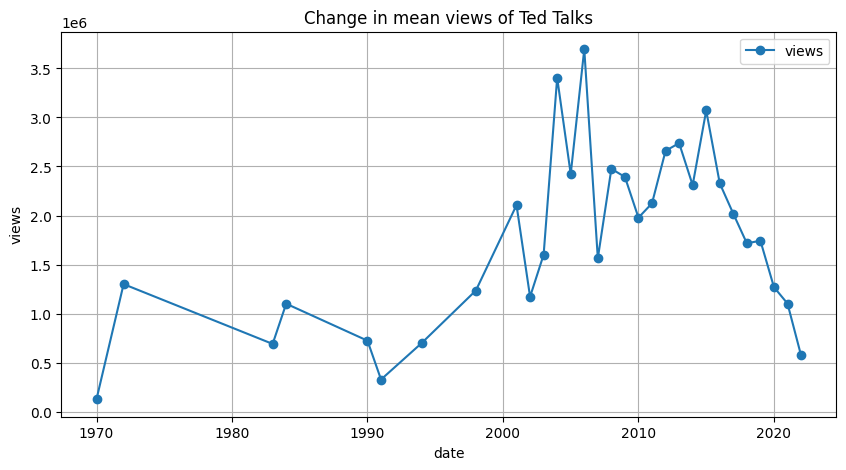

In [ ]:
grouped_views.plot(
    title='Change in mean views of Ted Talks',
    marker='o',
    figsize=(10, 5)
)

plt.ylabel('views')
plt.grid()
plt.show()

Построим гистограмму просмотров. Для информативности исключим малочисленные видео, у которых больше 3 млн просмотров.

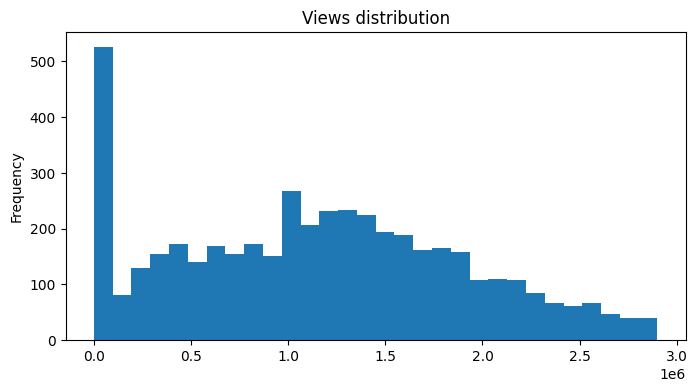

In [ ]:
df[df['views'] < 3e6]['views'].plot.hist(bins=30, figsize=(8,4), title='Views distribution')
plt.show()

#Выводы

В ходе данного занятия мы:

1. Определили роль предобработки данных в методологии CRISP-DM.
2. Освоили индексацию `DataFrame` на простом примере.
3. Научились заполнять пропуски во временных рядах на примере данных о курсе доллара и евро.
4. Приобрели навыки агрегации, фильтрации, сортировки и визуализации данных на примере датасета Kaggle с видео Ted.com.


##Данные об авторе

Зюков Алексей Алексеевич,

лаборант отдела-онлайн образования НИЯУ МИФИ,

бакалавр кафедры суперкомпьютерных технологий в инженерно-физическом моделировании НИЯУ МИФИ.

##Список использованной и рекомендованной литературы

1. Егоров, А. Д. Репозитории с лекциями по анализу данных в НИЯУ МИФИ. – Текст : электронный / А. Д. Егоров // GitHub : [сайт]. – URL: https://github.com/ShadarRim (дата обращения: 01.11.2025).
2. Малов, Д. А. Глубокое обучение и анализ данных : практическое руководство. / Д. А. Малов. – Текст : непосредственный. – Санкт-Петербург : БХВ-Петербург, 2023. – 272 с. : ил. – ISBN 978-5-9775-1172-8.
